## Introduction
### In this kernel, I will explore the comments in the dataset with Part of Speech (PoS) tagging and see how the distributions of PoS features differ between toxic and non-toxic comments.


<center><img src="https://i.imgur.com/CtyQ8Ag.png" width="250px"></center>

<center><b><font size=4>PLEASE UPVOTE THIS KERNEL IF YOU LIKE IT</font></b></center>

## What is Part of Speech Tagging ?

Part of Speech Tagging is the process of associating each word in a piece of text with a particular tag, which represents the type of word it is, i.e. proper noun, comparative adjective, interjection etc. For example, the word "Michael" is a singular proper noun, so its PoS tag would be NNP, which is the NLTK tag for singular proper noun. Another example is the word "smartest". It is a superlative adjective, so its PoS tag would be JJS, which is the NLTK tag for superlative adjective.

Here are all the PoS tags supported by NLTK :

* CC coordinating conjunction

* CD cardinal digit

* DT determiner

* EX existential there (like: “there is” … think of it like “there exists”)

* FW foreign word

* IN preposition/subordinating conjunction

* JJ adjective ‘big’

* JJR adjective, comparative ‘bigger’

* JJS adjective, superlative ‘biggest’

* LS list marker 1)

* MD modal could, will

* NN noun, singular ‘desk’

* NNS noun plural ‘desks’

* NNP proper noun, singular ‘Harrison’

* NNPS proper noun, plural ‘Americans’

* PDT predeterminer ‘all the kids’

* POS possessive ending parent’s

* PRP personal pronoun I, he, she

* PRP$ possessive pronoun my, his, hers

* RB adverb very, silently,

* RBR adverb, comparative better

* RBS adverb, superlative best

* RP particle give up

* TO, to go ‘to’ the store.

* UH interjection, errrrrrrrm
    
* VB verb, base form take

* VBD verb, past tense took

* VBG verb, gerund/present participle taking

* VBN verb, past participle taken

* VBP verb, sing. present, non-3d take

* VBZ verb, 3rd person sing. present takes

* WDT wh-determiner which

* WP wh-pronoun who, what

* WP$ possessive wh-pronoun whose

* WRB wh-abverb where, when

Now since we know what PoS tagging is, let's apply it on all the comments in the train data (actually only a sample) and see if we can extract useful insights from these PoS features !

## Preparing ground for analysis

### Import necessary libraries for data manipulation, tokenization and PoS Tagging

In [1]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from nltk import word_tokenize, pos_tag
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Define size of train data and sample size

In [2]:
DATA_LEN = 1804874
SAMPLE_SIZE = 100000

### Randomly select rows to skip during loading of the train data (we load only 100k comments and leave the remainder of the data)

In [3]:
rows = np.arange(0, DATA_LEN)
skip_rows = list(np.random.choice(rows[1:], DATA_LEN - SAMPLE_SIZE, replace=False))

### Load data while skipping pre-decided rows

In [4]:
data = pd.read_csv('../input/train.csv', skiprows=skip_rows)

### Tokenize all comments in the sample and generate PoS tags for them using NLTK. We use TQDM for the progress bar.

In [5]:
pos_tags = data['comment_text'].progress_apply(lambda x: pos_tag(word_tokenize(x)))
targets = data['target']

100%|██████████| 100000/100000 [05:41<00:00, 293.06it/s]


In [6]:
print(pos_tags[0])

[('Interesting', 'VBG'), ('.', '.'), ('I', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('curious', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('how', 'WRB'), ('this', 'DT'), ('works', 'VBZ'), ('out', 'RP'), ('.', '.'), ('I', 'PRP'), ('often', 'RB'), ('refrain', 'VBP'), ('from', 'IN'), ('commenting', 'VBG'), ('because', 'IN'), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('have', 'VB'), ('the', 'DT'), ('time', 'NN'), ('or', 'CC'), ('desire', 'NN'), ('to', 'TO'), ('engage', 'VB'), ('with', 'IN'), ('the', 'DT'), ('couple', 'NN'), ('of', 'IN'), ('resident', 'NN'), ('trolls', 'NNS'), ('who', 'WP'), ('seem', 'VBP'), ('to', 'TO'), ('jump', 'VB'), ('on', 'IN'), ('every', 'DT'), ('active', 'JJ'), ('WW', 'NNP'), ('comment', 'NN'), ('thread', 'NN'), ('.', '.')]


Above we have the PoS tags for the first comment in the sample. Each word is given a tag based on whether they are verbs, pronouns, nouns etc.

### Convert 2D tuples in *pos_tags* to lists
As we can see above, the word-tag pairs are stored as tuples. We convert them to lists for easier manipulation with numpy

In [7]:
tags = []
for i, tag in enumerate(pos_tags):
    pos_tags[i] = list(map(list, tag))
    tags.append(np.array(pos_tags[i])[:, 1])
flat_tags = np.concatenate([tag for tag in tags])

### Calculate count features from the PoS tags
We calculate features such as the number of times each tag occurs in each sentence

In [8]:
counts = [dict(Counter(tag)) for tag in tags]

### Define helper function to deal with the case of a tag not being there in a sentence and avoid a *KeyError*.

In [9]:
def count_pos(tag_dict, tag_name):
    if tag_name in tag_dict:
        return tag_dict[tag_name]
    else:
        return 0

### Create a pandas dataframe containing the PoS features dictionary and leave a dummy column for the tags.  

In [10]:
all_tags = set(flat_tags)
df = pd.DataFrame(np.zeros((SAMPLE_SIZE, 3)))
df.columns = ['count_dict', 'pos_feature', 'target']
df.count_dict = counts
df.target = targets

### All tags present in the data

In [11]:
all_tags

{'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``'}

## PoS Count Features Analysis
#### *Note : I have left out tags that don't provide useful insights*

### Define function to visualize count features with KDE distribution plots

#### *Note : Non-toxic in orange and Toxic in blue*

In [12]:
def visualize_count_feature(tag):
    df.pos_feature = [count_pos(counts[i], tag) for i in range(SAMPLE_SIZE)]
    df.pos_feature = df.pos_feature.mask(df.pos_feature == 0, np.nan) # Ignore sample when tag not present in sentence

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(ax=ax, a=[count for count in df.pos_feature.loc[df.target<0.5] if count==count], color='darkorange', label='non-toxic', hist=False)
    sns.distplot(ax=ax, a=[count for count in df.pos_feature.loc[df.target>0.5] if count==count], color='navy', label='toxic', hist=False)
    plt.title('" ' + tag + ' " ' + 'PoS tag count', fontsize=16, color='maroon')

    plt.show()

### "CC" or Coordinating Conjunction Tag

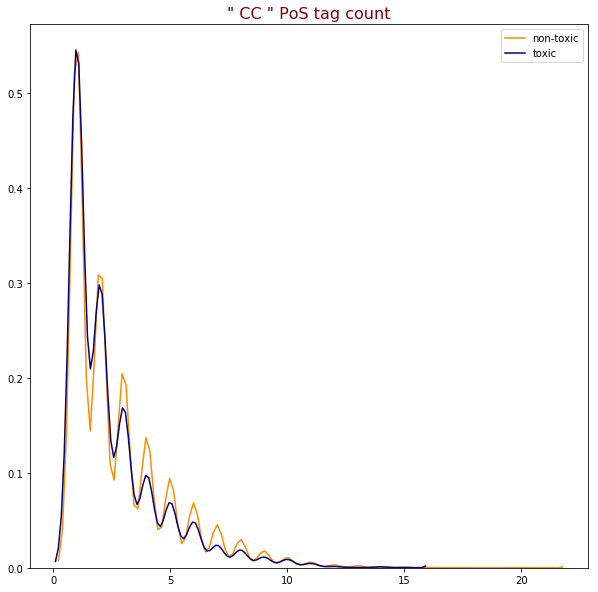

In [13]:
visualize_count_feature('CC')

Since these are count features, the probability density is concentrated around integers. The peaks of the orange distribution at the integers are higher than those of the blue distribution. This is compensated by the lower valleys of the orange curve. This means that non-toxic comments generally have more CCs than toxic comments. This is probably because a coordinating conjunction is generally a part of speech used when you are trying to communicate an idea or a perspective, and not just a low-level personal attack or insult. Communicating ideas requires joining more phrases in more complex ways, requiring more conjunctions.

### "CD" or Cardinal Digits Tag

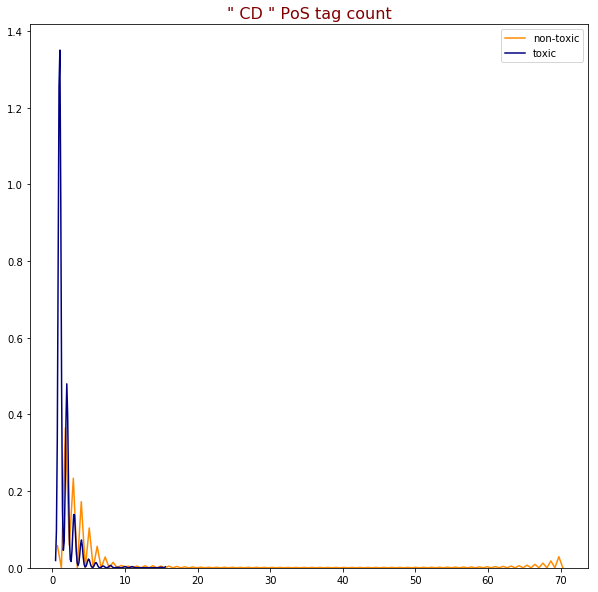

In [14]:
visualize_count_feature('CD')

The orange distribution again has higher peaks than the blue distribution. Also, the orange distribution is more skewed to the right. This means that non-toxic comments generally have more numbers than toxic comments. This is probably brcause a person trying to share an idea or say something useful is more likely to use numbers (dates, math etc) than someone trying to insult some person, faith etc. 

### "DT" or Determiner Tag

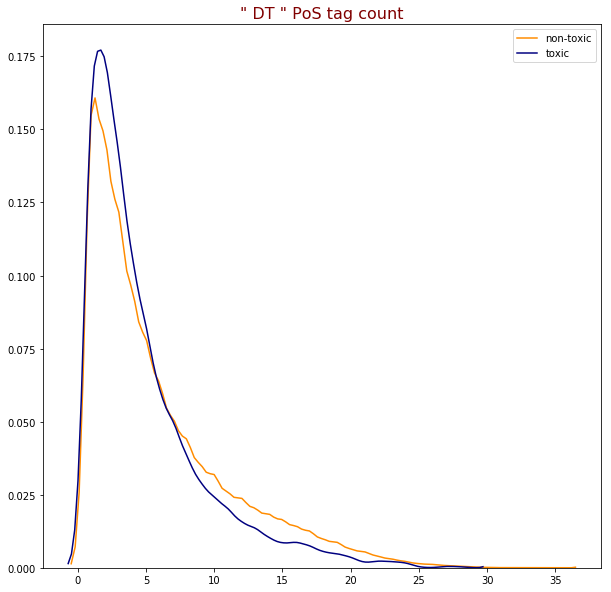

In [15]:
visualize_count_feature('DT')

The orange distribution is similar to the blue one, but the orange distribution seems to have a greater rightward skew. This shows that non-toxic comments generally have more determiners than toxic ones. This again comes down to the fact that non-toxic comments generally have more complete language.

### "IN" or Preposition Tag

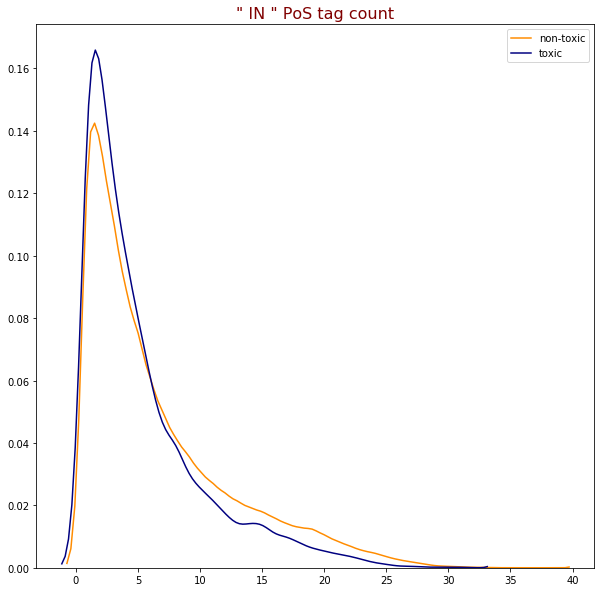

In [16]:
visualize_count_feature('IN')

Again, the orange distribution is similar to the blue one, but the orange seems to have greater rightward skew. This shows that non-toxic comments generally have more determiners than toxic ones. This again comes down to the fact that non-toxic comments generally have more complete language. 

### "POS" or Possessive Ending Tag

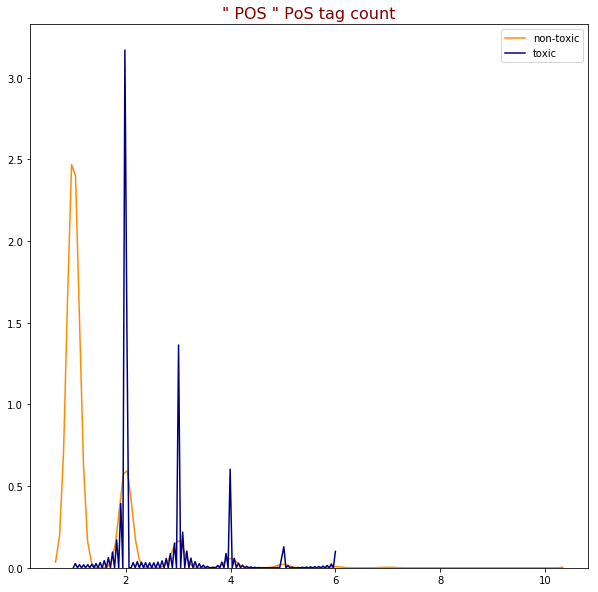

In [17]:
visualize_count_feature('POS')

The orange distribution seems to be more left-skewed than the blue distribution. It also looks like it has earlier peaks and a lower mean. This means that non-toxic comments generally have less possesive endings like "parent's", "children's" etc. I am not sure why this is the case. You're free to share your ideas in the comments below.

### "VBD", "VBG" and "VBZ" : Simple Past, Present-Participle and 3rd Person Verb Tag
### *AND*
### "VBP" : Simple Present Tag

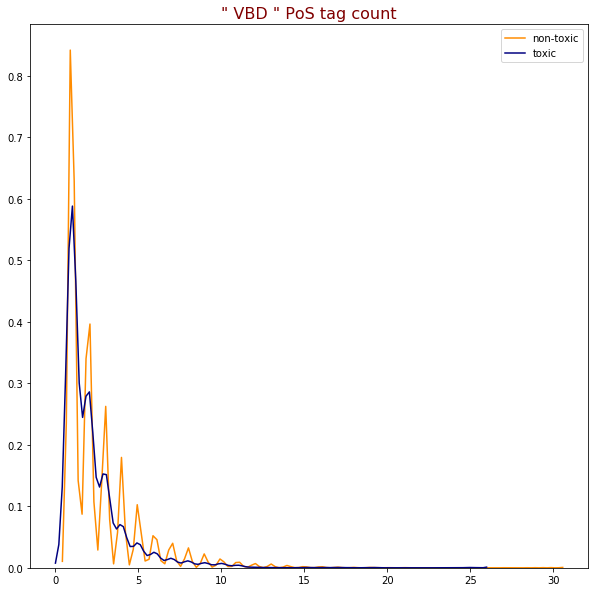

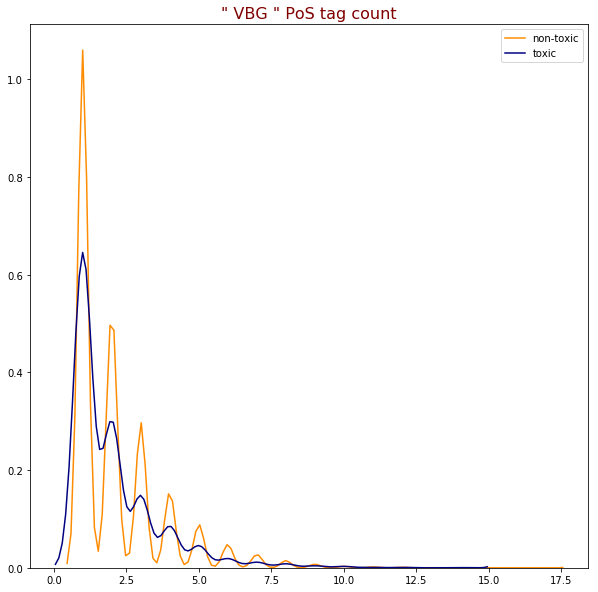

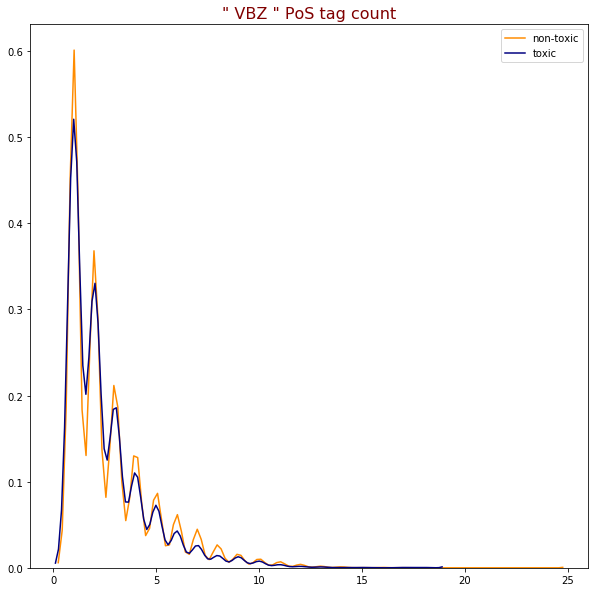

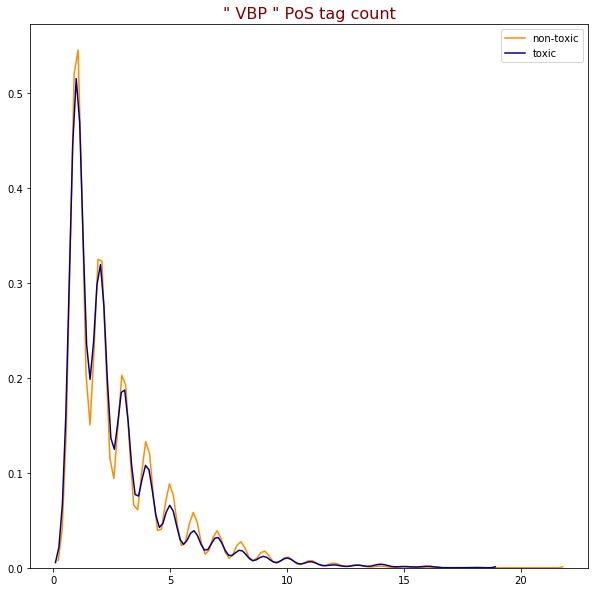

In [18]:
visualize_count_feature('VBD')
visualize_count_feature('VBG')
visualize_count_feature('VBZ')
visualize_count_feature('VBP')

The orange distribution has much greater peaks than the blue one in the first three plots. This again shows that **verbs in any other form other than the simple present tense tend to be used a lot more in non-toxic comments**. I think this is because toxic comments are generally talking about how bad or wrong something or somenone is **right now** in the simple present, like "ur a shi**y comment". They do not talk much in the past or future. This is probably why the gap in peaks is much smaller in 4th plot than the first three plots.    

### "UH" Interjection Tag

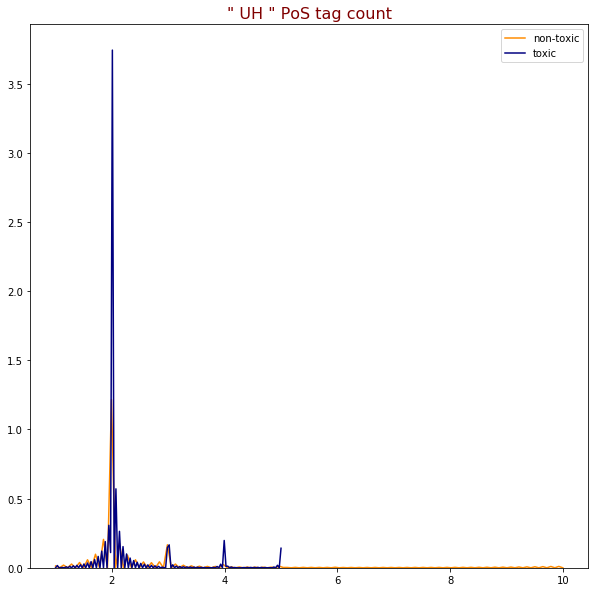

In [19]:
visualize_count_feature('UH')

The orange and blue distributions are pretty much the same, except the fact that the orange one is more skewed to the left and has a lower mean (the orange peak on the left is higher than its blue counterpart). This means that interjections are generally used more in toxic comments. This is because people generally use interjections to express strong emotions (especially negative emotions like anger, hate etc) as in sh*t, f**k and other swear words as well, and strong negative emotions are generally more prevalent in toxic comments.

### That's it ! Thanks for reading my kernel. I hope you found it useful :)